In [32]:
!pip install yfinance -q
!pip install plotly -q
!pip install matplotlib -q
!pip install pandas -q
!pip install ta -q
!pip install tensorflow-macos -q


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.graph_objects as go  ## better display graphs
import ta

In [34]:
## Example pulling Microsoft Stock

In [35]:
msft = yf.Ticker("MSFT")

In [36]:
hist = msft.history(period="max")

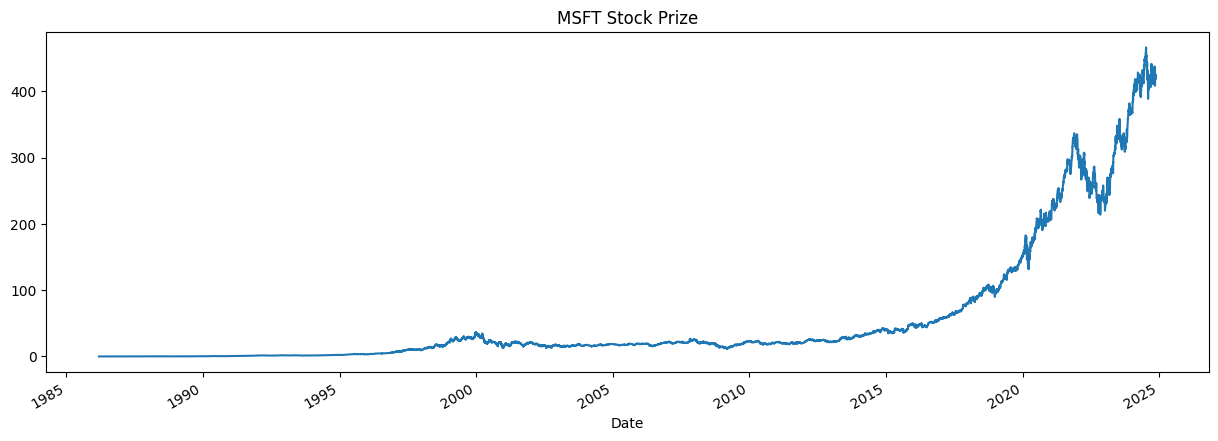

In [37]:
hist['Open'].plot(figsize=(15,5), title = "MSFT Stock Prize")
plt.show()

In [38]:
msft.balance_sheet

2024-06-30  \
Ordinary Shares Number                              7434000000.0   
Share Issued                                        7434000000.0   
Net Debt                                           33315000000.0   
Total Debt                                         67127000000.0   
Tangible Book Value                               121660000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   75531000000.0   
Other Short Term Investments                       57216000000.0   
Cash And Cash Equivalents                          18315000000.0   
Cash Equivalents                                    6744000000.0   
Cash Financial                                     11571000000.0   

                                                      2023-06-30  \
Ordinary Shares Number                              7432000000.0   
Share Issued                                        7432000000.0   
Net Debt                                           12533000000.0   
Total Debt                                         59965000000.0   
Tangible Book Value                               128971000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments  111256000000.0   
Other Short Term Investments                       76552000000.0   
Cash And Cash Equivalents                          34704000000.0   
Cash Equivalents                                   26226000000.0   
Cash Financial                                      8478000000.0   

                                                      2022-06-30  \
Ordinary Shares Number                              7464000000.0   
Share Issued                                        7464000000.0   
Net Debt                                           35850000000.0   
Total Debt                                         61270000000.0   
Tangible Book Value                                87720000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments  104749000000.0   
Other Short Term Investments                       90818000000.0   
Cash And Cash Equivalents                          13931000000.0   
Cash Equivalents                                    5673000000.0   
Cash Financial                                      8258000000.0   

                                                      2021-06-30  
Ordinary Shares Number                              7519000000.0  
Share Issued                                        7519000000.0  
Net Debt                                           43922000000.0  
Total Debt                                         67775000000.0  
Tangible Book Value                                84477000000.0  
...                                                          ...  
Cash Cash Equivalents And Short Term Investments  130256000000.0  
Other Short Term Investments                      116032000000.0  
Cash And Cash Equivalents                          14224000000.0  
Cash Equivalents                                    6952000000.0  
Cash Financial                                      7272000000.0  

[73 rows x 4 columns]

In [39]:
msft.calendar

{'Dividend Date': datetime.date(2024, 12, 11),
 'Ex-Dividend Date': datetime.date(2024, 11, 20),
 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)],
 'Earnings High': 3.47,
 'Earnings Low': 3.08,
 'Earnings Average': 3.16286,
 'Revenue High': 70520000000,
 'Revenue Low': 68488700000,
 'Revenue Average': 68937174200}

In [40]:
## Pulling other stocks
## top 10 stocks to buy in 2024

In [41]:
stonks = ['MSFT','NVDA','GOOGL','META','JPM','XOM','MA','CRM','AMD','AXP','MS']

In [42]:
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period='10y')  ## pulling 10 year data
    hists[s] = history

In [43]:
## Plotting the stock prize

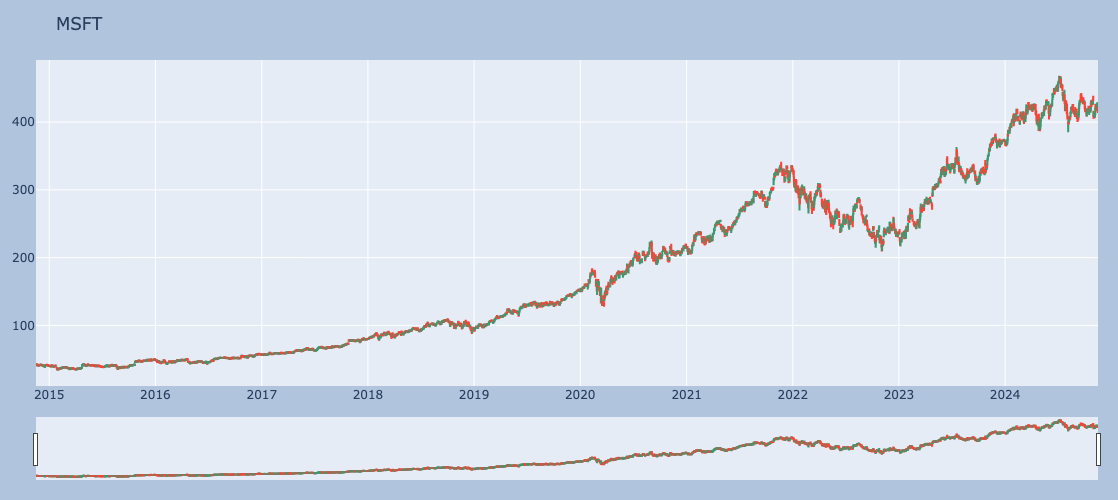

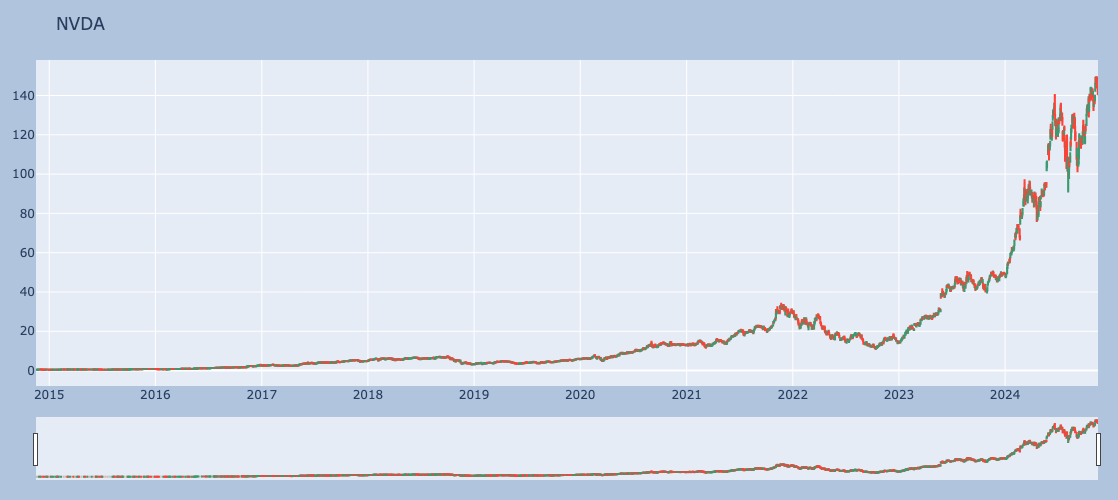

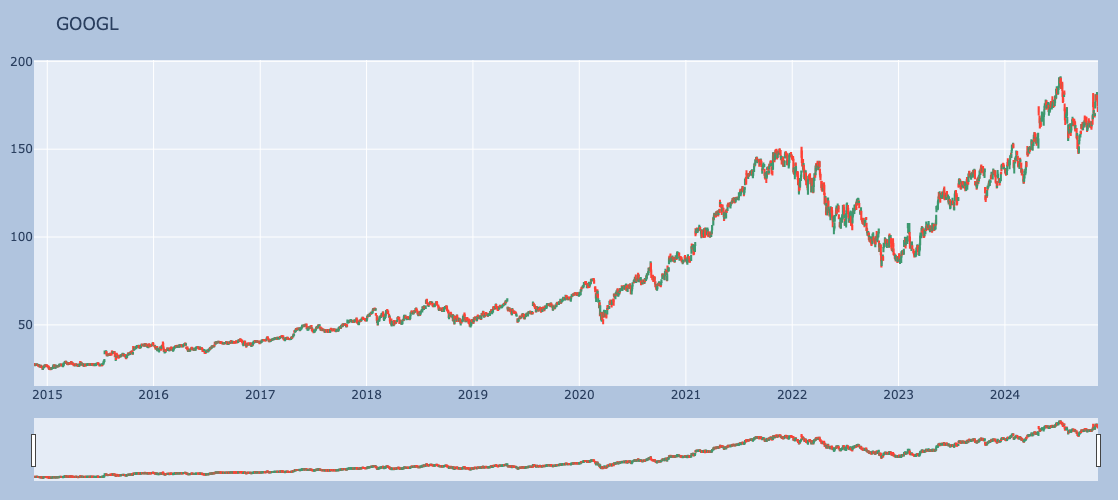

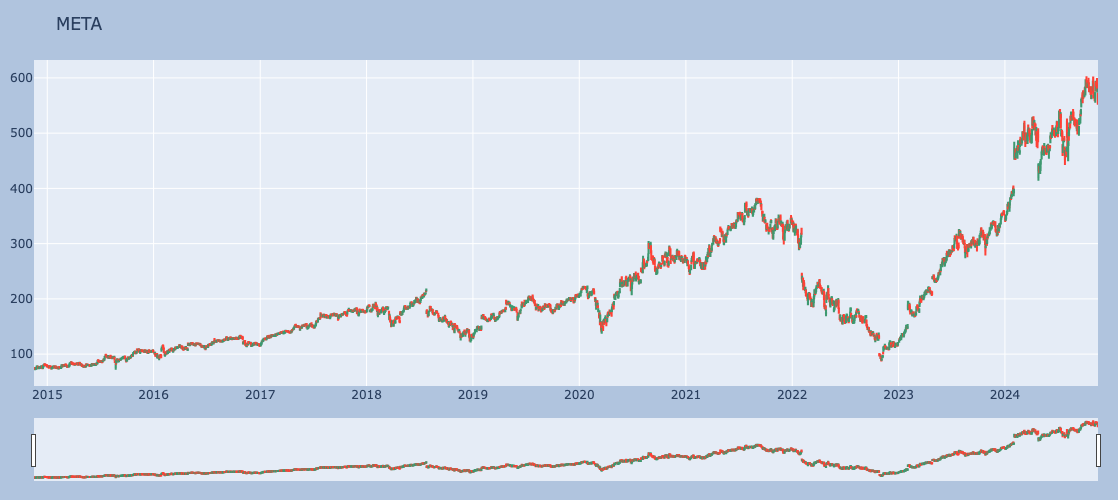

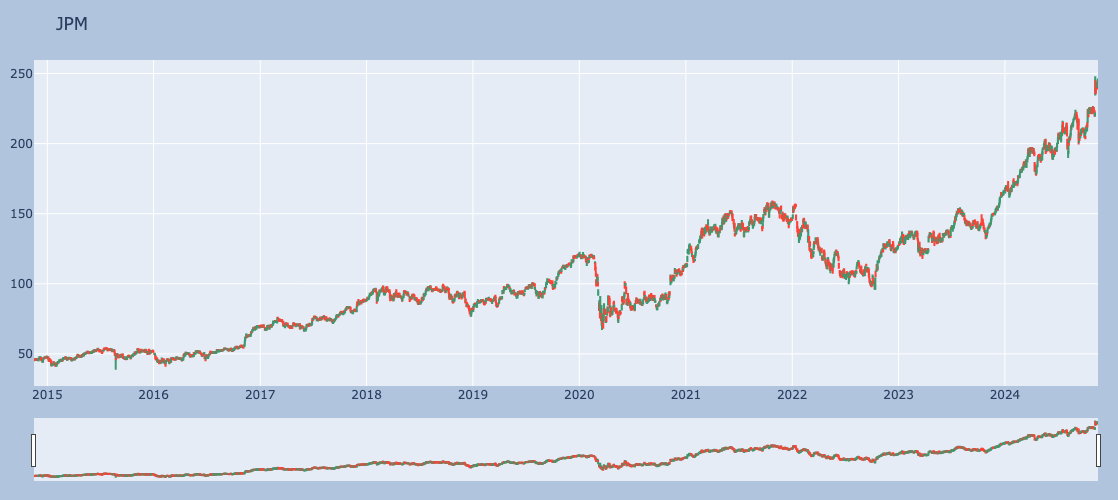

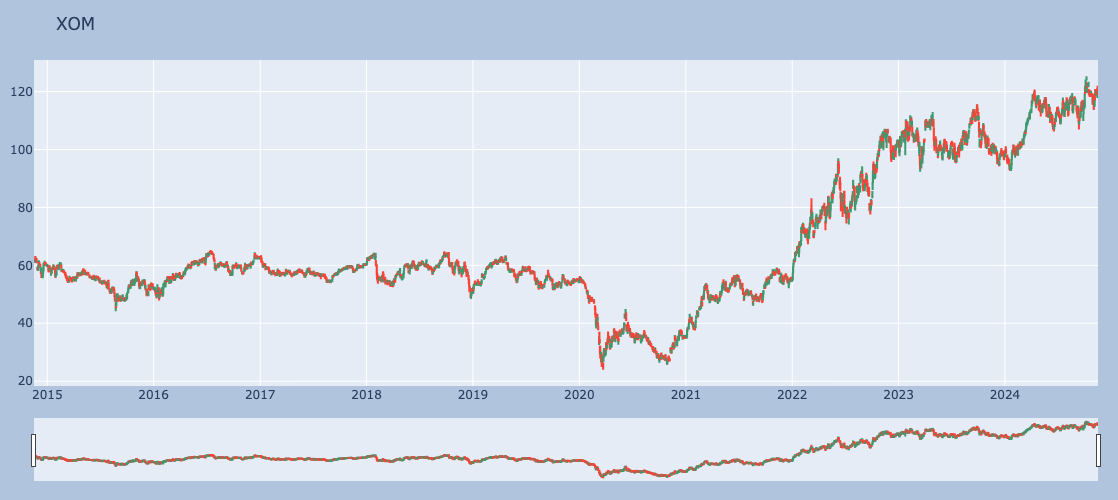

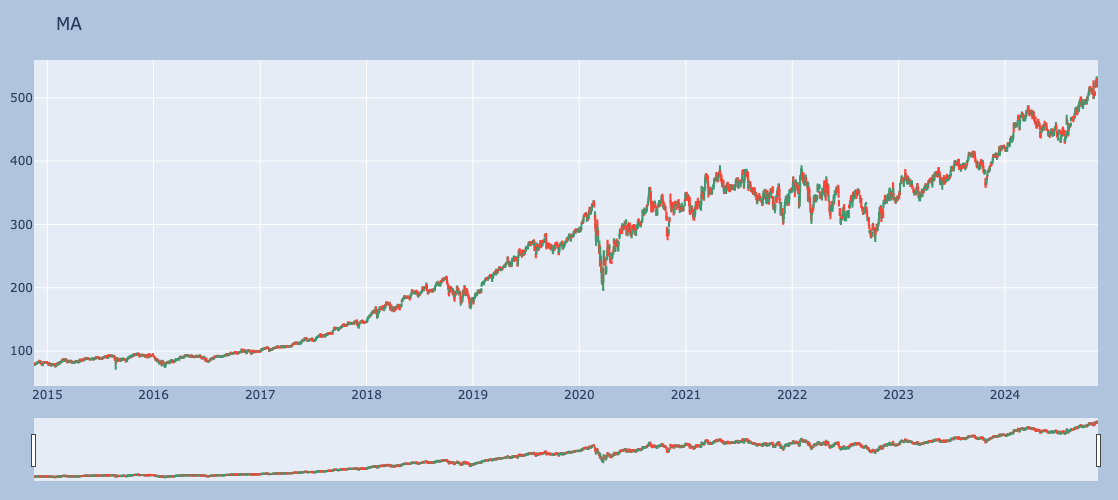

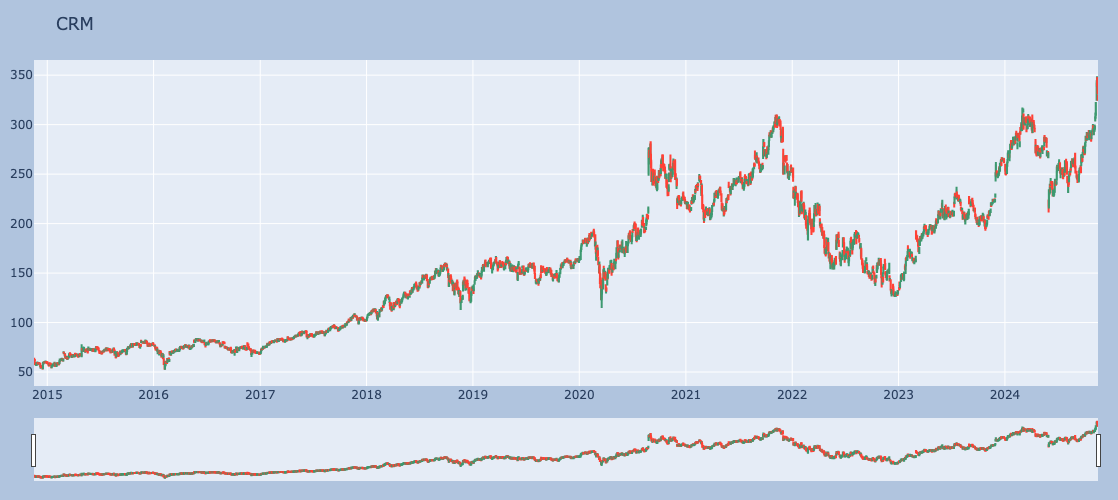

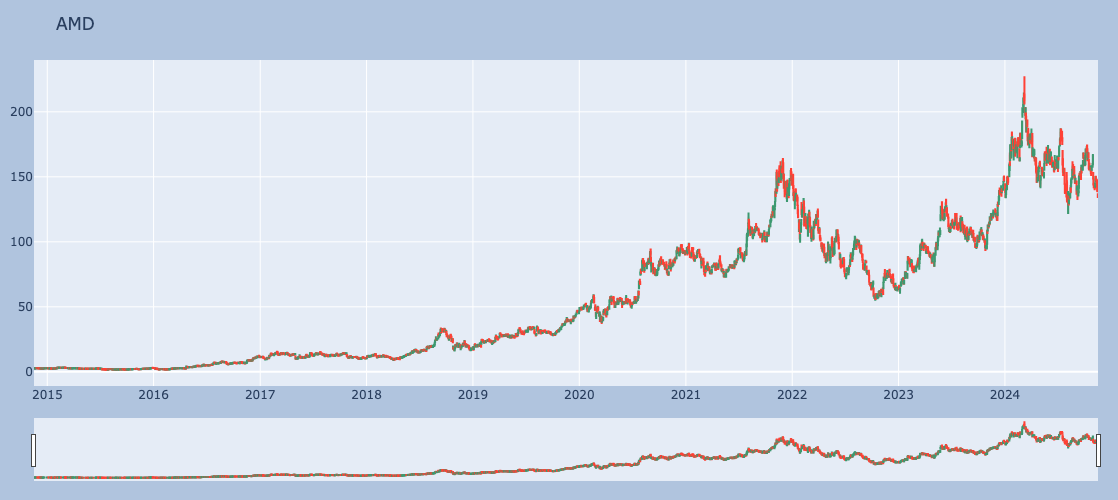

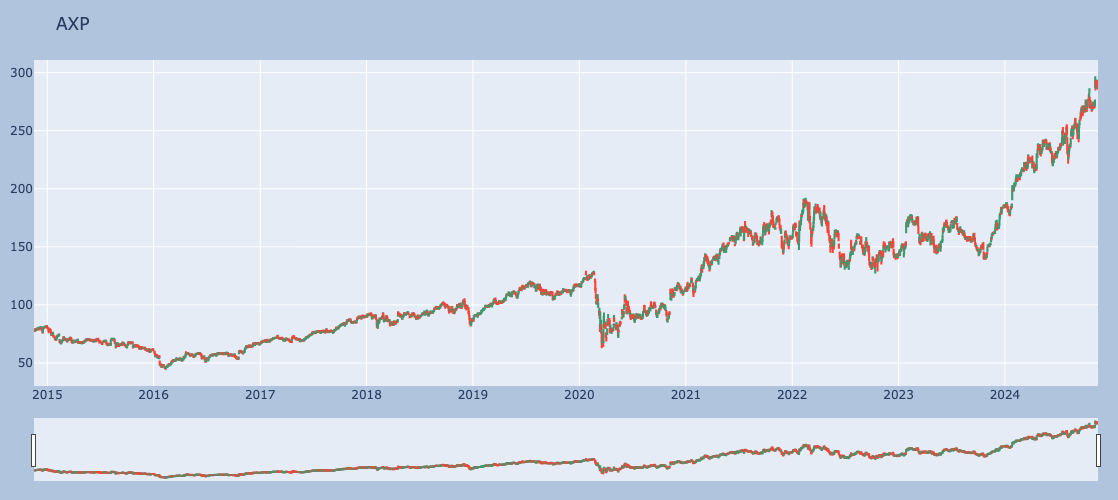

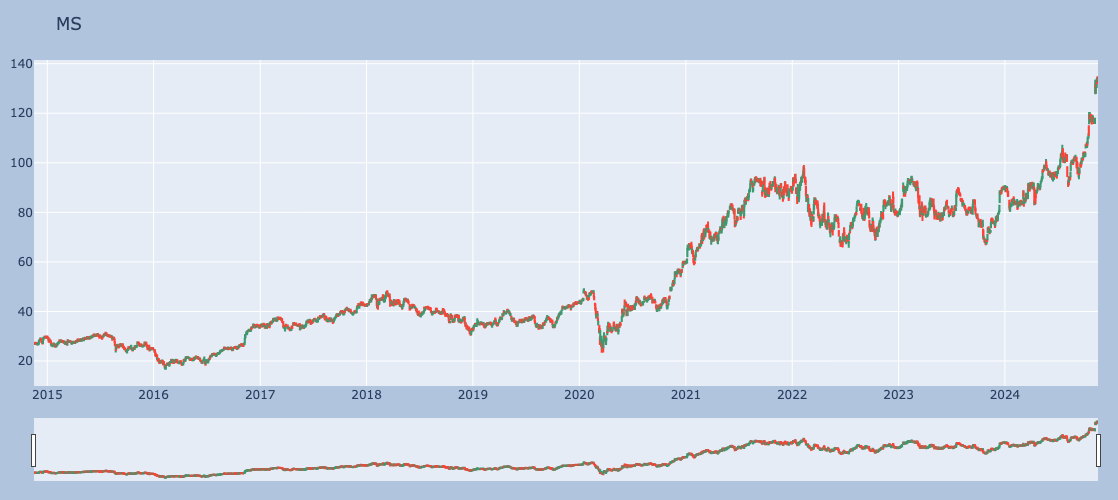

In [44]:
for stock in stonks:
    temp_df = hists[stock].copy()
    
    fig = go.Figure(
        data=[
            go.Candlestick(
                x = temp_df.index,
                open = temp_df["Open"],
                high = temp_df["High"],
                low = temp_df["Low"],
                close = temp_df["Close"],
            )
        ]
    )
    
    fig.update_layout(
        margin = dict(l=20, r=20, t=60, b=20),
        height = 500,
        paper_bgcolor = "LightSteelBlue",
        title = stock,
    )
    
    fig.show()

In [45]:
# Calculating Moving averages
# SMA - Simple Moving Average
# SMA = (Closing Price Day 1 + Closing Price Day 2 + ... + Closing Price Day N) / N
# N = the number of days in the period you are calculating the average for. 

# Moving averages smooth out price fluctuations and help identify trends.

In [46]:
# Adding more advanced features for better predictions
for stock, data in hists.items():
    data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-day Simple Moving Average
    data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
    data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()  # Exponential Moving Average
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)  # Relative Strength Index
    data['MACD'] = ta.trend.macd(data['Close'])  # MACD (Moving Average Convergence Divergence)
    data['Volume_Change'] = data['Volume'].pct_change()  # Volume percentage change
    data.dropna(inplace=True)  # Drop NaN rows caused by rolling calculations

In [47]:
# Splitting the Data into Training and Testing Sets

# The data is split into:
# X_train, y_train (80%): Used to train the model.
# X_test, y_test (20%): Used to test the model.
# shuffle=False ensures the data is split sequentially (important for time-series data).

#The model learns patterns from the training data and evaluates performance on unseen test data.

In [68]:
# Splitting data into training and testing sets with proper scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

msft_data = hists['MSFT'][['Close', 'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'MACD', 'Volume_Change']].dropna()
X = msft_data[['SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'MACD', 'Volume_Change']]
y = msft_data['Close']

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


In [69]:
# Random Forest Regression

# A RandomForestRegressor is trained on X_train (features) and y_train (target).
# Random Forest works by averaging the predictions of many decision trees. This reduces overfitting and improves generalization.

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter optimization for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train.ravel())

# Best model
rf_model = rf_grid.best_estimator_
rf_model.fit(X_train, y_train.ravel())

# Predictions
predictions = rf_model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test)


In [71]:
# Plotting Predicted vs Actual Prices

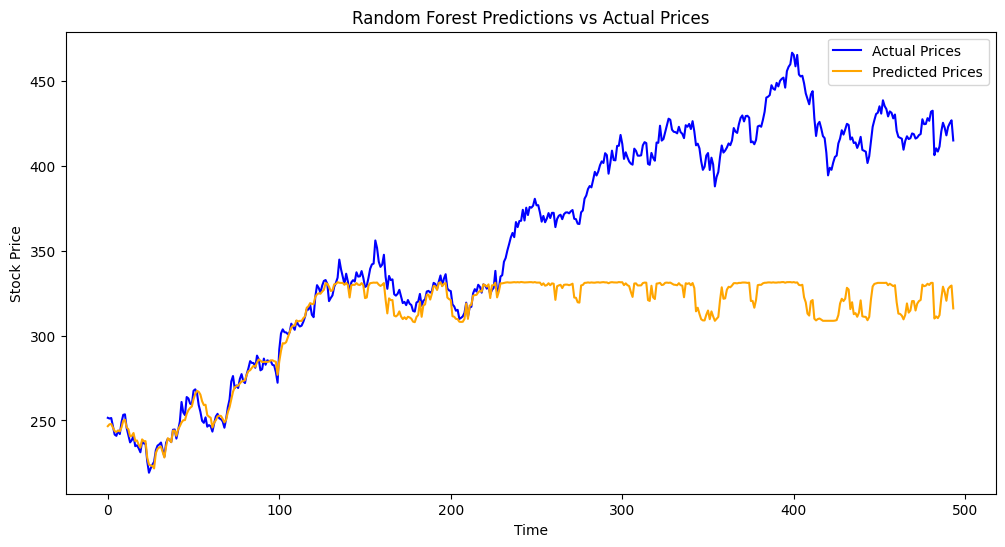

Predicted MSFT stock price: $316.02


In [72]:
import matplotlib.pyplot as plt

# Plot predictions vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Prices", color="blue")
plt.plot(predictions_rescaled, label="Predicted Prices", color="orange")
plt.legend()
plt.title("Random Forest Predictions vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

# Print the final predicted stock value
final_predicted_value = predictions_rescaled[-1][0]  # The last predicted value
print(f"Predicted MSFT stock price: ${final_predicted_value:.2f}")



In [73]:
# Model Evaluation

# Calculates the Mean Squared Error (MSE) to evaluate the model’s performance
# MSE quantifies the average squared difference between predicted and actual values.
# Lower MSE indicates better model performance.

# MSE: Measures error magnitude; lower is better.
# MAE: Indicates the average error in prediction.
# R-squared: Ranges from 0 to 1; higher values indicate better model fit. Negative R^2 
# suggests the model performs worse than a naive mean prediction.

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 0.022509060826250295
MAE: 0.10910771618631382
R-squared: 0.02528048359068502


In [75]:
# Find the index of the last row of the test set in the original data
last_test_index = msft_data.iloc[len(X_train) + len(X_test) - 1].name  # The last date in the test set
print(f"The predicted price of $316.96 corresponds to the date: {last_test_index}")


The predicted price of $316.96 corresponds to the date: 2024-11-15 00:00:00-05:00


In [76]:
# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test_rescaled - predictions_rescaled) / y_test_rescaled)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Percentage Error (MAPE): 11.51%
Model Accuracy: 88.49%


In [78]:
# Calculate MAPE for all test data points
mape_full = np.mean(np.abs((y_test_rescaled - predictions_rescaled) / y_test_rescaled)) * 100

# Print the result
print(f"Mean Absolute Percentage Error (MAPE) for all test data: {mape_full:.2f}%")


Mean Absolute Percentage Error (MAPE) for all test data: 11.51%


In [79]:
# Specific MAPE for one value
actual_price = 415  # Replace with actual price
predicted_price = 316.02  # Replace with predicted price

mape_specific = np.abs((actual_price - predicted_price) / actual_price) * 100
accuracy_specific = 100 - mape_specific

print(f"Specific MAPE: {mape_specific:.2f}%")
print(f"Specific Model Accuracy: {accuracy_specific:.2f}%")


Specific MAPE: 23.85%
Specific Model Accuracy: 76.15%
